<a href="https://colab.research.google.com/github/yejimene/TrabajoDistribuidos/blob/main/Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


# Vamos a realizar una busqueda de los mejores hiperparametros para cada modelo y tambien vamos a realizar una selección de descriptores.

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Estandarización

In [ ]:
import pandas as pd
df=pd.read_csv('train.csv')
X_train=df.iloc[:,:-1].values
Y_train=df.iloc[:,-1].values

Estandarizo los datos de entrenamiento.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Seleccion de descriptores

Primero importamos el modulo necesario

In [ ]:
!wget https://raw.githubusercontent.com/IA1819/Code/master/sbs1.py -O sbs.py

--2025-03-20 20:03:24--  https://raw.githubusercontent.com/IA1819/Code/master/sbs1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1691 (1.7K) [text/plain]
Saving to: ‘sbs.py’

sbs.py              100%[===================>]   1.65K  --.-KB/s    in 0s      

2025-03-20 20:03:24 (21.4 MB/s) - ‘sbs.py’ saved [1691/1691]



In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)
forest.fit(X_train,Y_train)
relevancias = forest.feature_importances_
indices = np.argsort(relevancias)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,(df.columns[:-1] )[indices[f]],relevancias[indices[f]]))

 1) SL                             0.260929
 2) EEG                            0.227183
 3) BP                             0.178275
 4) HR                             0.169817
 5) CIRCULATION                    0.163796


Para el modelo RandomForest son mas utiles los descriptores 'SL', 'EEG' y 'BP'

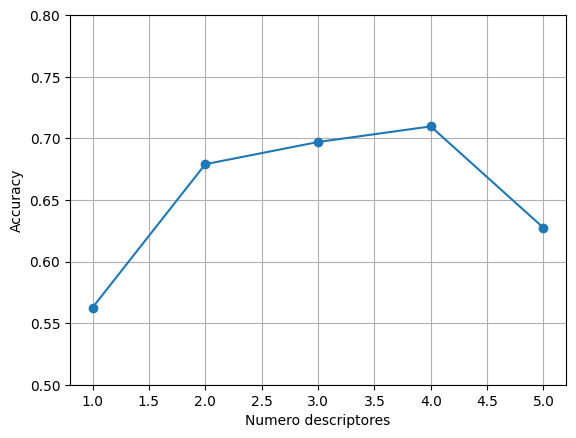

In [ ]:
from sbs import SBS
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=3)
sbs= SBS(knn,k_features=1)
sbs.fit(X_train,Y_train)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.5,0.8])
plt.ylabel('Accuracy')
plt.xlabel('Numero descriptores')
plt.grid()
plt.show()

Mostramos la importancia de cada descriptor:
---



Vamos a ver los tres descriptores más importantes

In [ ]:
k5 = list(sbs.subsets_[2])
print(df.columns[:-1][k5])

Index(['SL', 'HR', 'CIRCULATION'], dtype='object')


En conclusion, los mejores descriptores que mayor información dan son "SL", "EEG", "CIRCULATION".

# Busca de Hiperparametros

Definimos la funcion para buscarlos

In [ ]:
def find_best_hyperparameters_randomsearch(model, param_grid, X_train, Y_train, scores, cv=5,n_iter=10):
    for score in scores:
        print(f"Tuning for {score}")

        clf = RandomizedSearchCV(model, param_grid, scoring=score, cv=cv,n_iter=n_iter)

        clf.fit(X_train, Y_train)

        print(f"Best parameters for {score}: {clf.best_params_}")
scores = ['accuracy']

KNN

In [ ]:
modelKNN = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': list(range(1, 26, 2))}
find_best_hyperparameters_randomsearch(modelKNN, knn_param_grid, X_train, Y_train, scores)

Tuning for accuracy
Best parameters for accuracy: {'n_neighbors': 5}


Arboles de decisión

In [ ]:
modelTree= DecisionTreeClassifier()
tree_param_grid = {'min_samples_split': list(range(2, 11))}
find_best_hyperparameters_randomsearch(modelTree, tree_param_grid, X_train, Y_train, scores)

Tuning for accuracy


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for accuracy: {'min_samples_split': 10}


Regresión Logistica:

In [ ]:
modelLR = LogisticRegression()
param_grid = {'C': [0.1, 1, 10], 'max_iter': [100, 1000, 10000]}
find_best_hyperparameters_randomsearch(modelLR,param_grid,X_train,Y_train,scores)

Tuning for accuracy


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for accuracy: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/py

SVM:

In [ ]:
modelSVC=SVC()
param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'coef0': [-1, 0, 1]
}
find_best_hyperparameters_randomsearch(modelSVC,param_grid,X_train,Y_train,scores)

Tuning for accuracy
Best parameters for accuracy: {'kernel': 'poly', 'gamma': 1, 'coef0': 1}


Red Neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier
clfMLP = MLPClassifier(random_state=84,max_iter=500)
parametros = {
    'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'momentum': [0.9, 0.95, 0.99],
    'learning_rate_init': [0.001, 0.01, 0.1]
}
find_best_hyperparameters_randomsearch(clfMLP,parametros,X_train,Y_train,scores)

Tuning for accuracy


RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=42)
param_grid = {
    'min_samples_split': [2, 5, 10]
    }
find_best_hyperparameters_randomsearch(modelRF,param_grid,X_train,Y_train,scores)

Tuning for accuracy


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for accuracy: {'min_samples_split': 5}
